# Comparing LDA Models 40 vs 90 topics
- Richard Kuzma, 8SEP2020

## Load LDA models

In [45]:
### Imports

# basic
from pprint import pprint
import pickle
import time

# data science
import pandas as pd

# NLP
import gensim
from gensim.models import CoherenceModel, LdaModel

# plotting
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
### save best perplexity model (8 topics)
path = '/Users/richardkuzma/coding/analysis/monster/models/'

filename = 'monster_jobs_LDA_40_topics_cv_zero476.pkl'
with open(path+filename, 'rb') as f:
    LDA_40 = pickle.load(f)
    
filename = 'monster_jobs_LDA_90_topics_cv_zero461.pkl'
with open(path+filename, 'rb') as f:
    LDA_90 = pickle.load(f)


In [3]:
def visualize_lda(model, corpus, dictionary):
    """returns the pyLDAvis PreparedData given model, corpus, dictionary"""
    """Could pickle this to save it"""
    """pyLDAvis.save_html(vis, "filename") also works to export in html"""
    pyLDAvis.enable_notebook()
    t0 = time.time()
    vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    print('{} seconds'.format(time.time()-t0))
    return vis

def print_lda_topics(lda_model):
    pprint(lda_model.print_topics())

## Compare topic lists

In [6]:
LDA_40.print_topics(40)

[(0,
  '0.041*"customer" + 0.020*"ability" + 0.017*"company" + 0.014*"safety" + 0.014*"equipment" + 0.013*"perform" + 0.013*"product" + 0.012*"vehicle" + 0.011*"education" + 0.011*"duty"'),
 (1,
  '0.043*"support" + 0.028*"system" + 0.027*"network" + 0.020*"technical" + 0.016*"customer" + 0.015*"issue" + 0.013*"security" + 0.013*"troubleshoot" + 0.013*"software" + 0.012*"knowledge"'),
 (2,
  '0.088*"training" + 0.027*"golden_corral" + 0.025*"benefit" + 0.017*"engineering" + 0.014*"variety" + 0.012*"tree" + 0.011*"construction" + 0.011*"material" + 0.010*"must" + 0.010*"religion_creed_sex_sexual"'),
 (3,
  '0.079*"project" + 0.036*"construction" + 0.015*"schedule" + 0.014*"manager" + 0.011*"site" + 0.010*"management" + 0.010*"engineering" + 0.009*"estimate" + 0.009*"commercial" + 0.009*"design"'),
 (4,
  '0.041*"quality" + 0.020*"safety" + 0.015*"process" + 0.014*"product" + 0.013*"manufacturing" + 0.012*"company" + 0.012*"program" + 0.011*"production" + 0.010*"ensure" + 0.007*"manageme

In [8]:
LDA_90.print_topics(90)


[(0,
  '0.035*"customer" + 0.022*"business" + 0.020*"new" + 0.015*"sale" + 0.015*"ability" + 0.013*"level" + 0.012*"mop" + 0.011*"manager" + 0.011*"custodial" + 0.010*"branch"'),
 (1,
  '0.022*"duty" + 0.020*"ability" + 0.017*"procedure" + 0.016*"follow" + 0.015*"assign" + 0.014*"maintain" + 0.013*"perform" + 0.013*"policy" + 0.011*"maintains" + 0.011*"equipment"'),
 (2,
  '0.036*"product" + 0.017*"development" + 0.015*"design" + 0.013*"technical" + 0.013*"process" + 0.010*"ability" + 0.009*"project" + 0.008*"customer" + 0.008*"business" + 0.008*"engineering"'),
 (3,
  '0.025*"industry" + 0.023*"quality" + 0.023*"ability" + 0.021*"utensil" + 0.020*"cook" + 0.020*"length" + 0.016*"involves_repetitive_motion" + 0.016*"steam_risk_conditions" + 0.016*"follow" + 0.016*"must"'),
 (4,
  '0.049*"ohio" + 0.048*"oh" + 0.030*"control" + 0.026*"layout" + 0.023*"indiana" + 0.020*"mi" + 0.020*"de" + 0.019*"logic" + 0.019*"must" + 0.017*"forward_resume"'),
 (5,
  '0.044*"equipment" + 0.034*"maintenan

In [37]:
# show word idx, weight of each word in topic
LDA_90.get_topic_terms(5, topn=20)

[(441, 0.044275846),
 (296, 0.0341209),
 (697, 0.029751014),
 (1723, 0.02619798),
 (487, 0.019073576),
 (1526, 0.015159673),
 (1175, 0.014141219),
 (363, 0.012648622),
 (1500, 0.010467129),
 (273, 0.009863149),
 (503, 0.008344776),
 (329, 0.008338819),
 (72, 0.008184618),
 (119, 0.008092706),
 (286, 0.007999451),
 (598, 0.007883917),
 (1539, 0.0077537633),
 (207, 0.0072543113),
 (690, 0.0067674946),
 (299, 0.006603406)]

In [38]:
# show each word in topic and weight
LDA_90.show_topic(5, topn=20)

[('equipment', 0.044275846),
 ('maintenance', 0.0341209),
 ('technician', 0.029751014),
 ('electrical', 0.02619798),
 ('mechanical', 0.019073576),
 ('repair', 0.015159673),
 ('facility', 0.014141219),
 ('system', 0.012648622),
 ('installation', 0.010467129),
 ('industrial', 0.009863149),
 ('perform', 0.008344776),
 ('power', 0.008338819),
 ('must', 0.008184618),
 ('tool', 0.008092706),
 ('knowledge', 0.007999451),
 ('control', 0.007883917),
 ('troubleshoot', 0.0077537633),
 ('building', 0.0072543113),
 ('plant', 0.0067674946),
 ('manufacturing', 0.006603406)]

weighted sum after 0 topic words: 0.04427584633231163
weighted sum after 10 topic words: 0.22404388152062893
weighted sum after 20 topic words: 0.29938162257894874
weighted sum after 30 topic words: 0.3566784872673452
weighted sum after 40 topic words: 0.40087411645799875
weighted sum after 50 topic words: 0.43591496301814914
weighted sum after 60 topic words: 0.4660583429504186
weighted sum after 70 topic words: 0.4931152309291065
weighted sum after 80 topic words: 0.5181745234876871
weighted sum after 90 topic words: 0.5407413621433079
weighted sum after 100 topic words: 0.5619334019720554
weighted sum after 110 topic words: 0.5817788785789162
weighted sum after 120 topic words: 0.599445442087017
weighted sum after 130 topic words: 0.6160220896126702
weighted sum after 140 topic words: 0.6314464734168723
weighted sum after 150 topic words: 0.6461891025537625
weighted sum after 160 topic words: 0.6604105401784182
weighted sum after 170 topic words: 0.6737891455413774
weighted sum afte

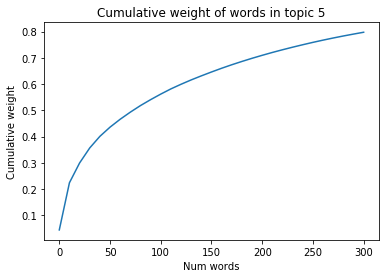

In [39]:
topic_num = 5

w_sum = 0
count = 0
idx = []
cum_weight = []
for i in LDA_90.show_topic(topic_num, topn=301):
    w_sum += i[1]
    if count%10 == 0:
        print('weighted sum after {} topic words: {}'.format(count, w_sum))
        idx.append(count)
        cum_weight.append(w_sum)
    count += 1

### plot cumulative weight of words
plt.plot(idx, cum_weight, label = 'cum_weight')
plt.title("Cumulative weight of words in topic " + str(topic_num))
plt.xlabel("Num words")
plt.ylabel("Cumulative weight")
# plt.legend(("perplex_values"), loc='best')
plt.show()

### Thoughts
- I like 90 topics more than 40
- Takes 150+ words to get to 80% of the probability distribution for a given topic
- Should we sum over all the words? a specific number (e.g. top 100 words)? until a cum_sum reached (0.5)?

## Visualization

### Load corpus and dict

In [42]:
path = '/Users/richardkuzma/coding/analysis/monster/data/cleaned/'
filename = 'monster_jobs_dict.pkl'
with open(path+filename, 'rb') as f:
    jobs_dict = pickle.load(f)

filename = 'monster_jobs_corpus.pkl'
with open(path+filename, 'rb') as f:
    jobs_corpus = pickle.load(f)


In [46]:
### pyLDAvis of the 90 topic model
vis_LDA_90 = visualize_lda(LDA_90, jobs_corpus, jobs_dict)
vis_LDA_90


123.86967301368713 seconds


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
68    -0.038728  0.157993       1        1  4.690084
87     0.168110 -0.019659       2        1  4.392476
34    -0.092093 -0.165305       3        1  3.655197
72     0.084357  0.055802       4        1  3.146268
20     0.145595  0.048635       5        1  2.855775
...         ...       ...     ...      ...       ...
10     0.070666  0.048598      86        1  0.198068
63    -0.042668 -0.010159      87        1  0.153624
4     -0.077011  0.051188      88        1  0.151747
77     0.056869  0.039371      89        1  0.122586
31    -0.060469  0.056635      90        1  0.122138

[90 rows x 5 columns], topic_info=               Term          Freq         Total Category  logprob  loglift
653           store  23249.000000  23249.000000  Default  30.0000  30.0000
26         customer  39554.000000  39554.000000  Default  29.0000  29.0000
530            sale  21263.000000  21263.000000  Default  28.0000  28.0000
91          project  23191.000000  23191.000000  Default  27.0000  27.0000
210            care  13265.000000  13265.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
5859          beach     43.850620    107.299393  Topic90  -4.6708   5.8129
3783     california     69.954285    331.308472  Topic90  -4.2038   5.1526
6209  ever_changing     38.231091     94.893280  Topic90  -4.8080   5.7987
1255     relocation     39.716801    383.345459  Topic90  -4.7699   4.4406
219         company     41.033211  24817.287109  Topic90  -4.7373   0.3029

[5938 rows x 6 columns], token_table=      Topic      Freq                          Term
term                                               
6142     25  0.983710      abilities_close_distance
8221     59  0.990973  abilities_typically_acquired
185       1  0.023834                       ability
185       2  0.029014                       ability
185       3  0.136483                       ability
...     ...       ...                           ...
4549     69  0.045601                            yr
4549     83  0.009772                            yr
4549     84  0.273606                            yr
5507     49  0.950850                       yrs_exp
4963     22  0.918418                       zealand

[53288 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[69, 88, 35, 73, 21, 80, 2, 7, 51, 57, 41, 22, 3, 75, 27, 6, 50, 8, 28, 17, 58, 85, 56, 23, 44, 61, 25, 26, 83, 37, 54, 47, 16, 10, 43, 70, 60, 66, 14, 65, 81, 76, 38, 77, 48, 46, 74, 30, 49, 59, 52, 9, 79, 33, 13, 24, 62, 86, 12, 82, 72, 71, 40, 42, 34, 19, 84, 67, 63, 15, 68, 20, 89, 87, 39, 90, 4, 29, 18, 36, 1, 55, 53, 45, 31, 11, 64, 5, 78, 32])

## LDA with 30 topics

In [ ]:
pprint(best_model.print_topics())

## Convert KSB LDA Topics to vectors

### Load w2v KeyedVectors model trained on Google News
Note, KeyedVectors models are not full models you can retrain

In [ ]:
goog = gensim.models.KeyedVectors.load_word2vec_format('/Users/richardkuzma/coding/analysis/utils/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=500000)
print('loaded google w2v model of size 500,000 with dimension 300 vectors')


In [ ]:
### use LDA probability distribution to find the center vector of each topic

pos_all = []
total_missed_words = 0

for i in range (0, best_model.num_topics): # for each LDA topic
    print('\n' + '-'*40 + 'Topic Number: {}'.format(i) + '-'*40 + '\n')
    missed_words = 0
    pos_topic = []
    for j in range(0, len(best_model.show_topic(i))): # for each words in a given topic
        try:
            # multiply w2v word vector by weight
            pos_topic.append(goog[best_model.show_topic(i)[j][0]]*float(best_model.show_topic(i)[j][1]))
            print('appended weighted vector for topic: {} and sub-word #{}: {} '.format(i, j, best_model.show_topic(i)[j][0]))
        except KeyError:
            print('Key error.......missed a word from topic: {}, number: {}, word: {}'.format(i,j,best_model.show_topic(i)[j][0]))
            missed_words +=1 
    
    total_missed_words += missed_words
    pos_all.append(pos_topic)
    print('\nappended pos_topic {} to pos_all'.format(i))
    print('Missed {} words'.format(missed_words))
    
print('Missed words in total: {}'.format(total_missed_words))
    

    
    
    
    

In [ ]:
### use weighted word vectors to find the top 20 most similar words for each topic

similar_to_LDA_topics = []
for i in range(0, best_model.num_topics):
    similar_to_LDA_topics.append(goog.wv.most_similar(positive=pos_all[i], topn=15))

from pprint import pprint
for i in range(0, len(similar_to_LDA_topics)):
    print('Topic #{} most similar words'.format(i))
    pprint(similar_to_LDA_topics[i])
    print('\n\n' +'*'*40 + '\n\n')

## Save 30-topic LDA model derived from 10,000 KSB aggregate list

In [ ]:
path = '/Users/richardkuzma/coding/analysis/monster/models/'
filename = 'LDA_30_topics_10k_KSBs'

with open(path+filename, 'wb') as f:
    pickle.dump(best_model, f)

# Evaluation

Best model (by coherence):
- LdaModel(num_terms=6107, <b>num_topics=30</b>, decay=0.5, chunksize=2000)
- Coherence of <b>0.6807534740840404</b>
- Saved to '/Users/richardkuzma/coding/analysis/monster/models/LDA_30_topics_10k_KSBs'

Using a comprehensive list of 10,000 KSBs for LDA yields 20-30 topics that are too large. (e.g. 'supervisor', 'techincian', 'professional'. Will try to create separate LDA models for each